<h2 align="center">Automatic Machine Learning with H2O AutoML</h2>

### Task 2: Importing Packages

In [1]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

### Task 3: Loading and Exploring the Data

In [3]:
xls = pd.ExcelFile('data/bank_term_deposit_marketing_analysis.xlsx')

In [4]:
xls.sheet_names

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [5]:
client_info = pd.read_excel(xls, 'CLIENT_INFO')
loan_history = pd.read_excel(xls, 'LOAN_HISTORY')
marketing_history = pd.read_excel(xls, 'MARKETING HISTORY')
subscription_history = pd.read_excel(xls, 'SUBSCRIPTION HISTORY')

In [6]:
client_info.head()

,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58,management,married,tertiary
1,2837,44,technician,single,secondary
2,2838,33,entrepreneur,married,secondary
3,2839,47,blue-collar,married,unknown
4,2840,33,unknown,single,unknown


In [7]:
loan_history.head()

,ID,DEFAULT,BALANCE,HOUSING,LOAN
0,2836,no,2143,yes,no
1,2837,no,29,yes,no
2,2838,no,2,yes,yes
3,2839,no,1506,yes,no
4,2840,no,1,no,no


In [8]:
subscription_history.tail()

,ID,TERM_DEPOSIT
45206,48042,yes
45207,48043,yes
45208,48044,yes
45209,48045,no
45210,48046,no


In [9]:
df = pd.merge(client_info, loan_history, on = ['ID'])
df = pd.merge(df, marketing_history, on=['ID'])
df = pd.merge(df, subscription_history, on=['ID'])
df.head()

,ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2837,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2838,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,2839,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,2840,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
df = df.drop(['ID'], axis = 1)

In [11]:
df.head()

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Task 4: Data Prep & Start H2O

In [12]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /home/rhyme/.local/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpy0f3qbbb
  JVM stdout: /tmp/tmpy0f3qbbb/h2o_rhyme_started_from_python.out
  JVM stderr: /tmp/tmpy0f3qbbb/h2o_rhyme_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.3
H2O_cluster_version_age:,4 months and 26 days !!!
H2O_cluster_name:,H2O_from_python_rhyme_jss014
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.920 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [13]:
h2o_df = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [14]:
h2o_df.describe()

Rows:45211
Cols:17




,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432807,,,,,1362.2720576850802,,,,15.806418791886923,,258.16307978146915,2.7638406582468997,40.19782796222158,0.5803233726305561,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.618762040975398,,,,,3044.7658291685216,,,,8.32247615304459,,257.52781226517124,3.0980208832791805,100.12874599059822,2.303441044931215,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [15]:
train, test = h2o_df.split_frame(ratios = [0.75])
x = train.columns
y = 'TERM_DEPOSIT'
x.remove(y)

### Task 5: Run H2O AutoML

In [16]:
from h2o.automl import H2OAutoML


In [18]:
aml = H2OAutoML(max_runtime_secs = 600,
               balance_classes = True,
               project_name = 'Final',
               stopping_metric = 'logloss',
               seed=1)
%time aml.train(x = x, y = y, training_frame = train)

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 1min 40s, sys: 923 ms, total: 1min 41s
Wall time: 9min 54s


### Task 6: AutoML Leaderboard and Ensemble Exploration

In [21]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20201010_052236,0.934658,0.220409,0.626432,0.179185,0.256079,0.0655764
XGBoost_grid__1_AutoML_20201010_052236_model_2,0.93359,0.200378,0.624029,0.174666,0.250613,0.0628068
GBM_grid__1_AutoML_20201010_052236_model_1,0.931021,0.202441,0.612426,0.167859,0.252229,0.0636195
StackedEnsemble_AllModels_AutoML_20201010_052236,0.930965,0.2133,0.623914,0.174129,0.254366,0.064702
XGBoost_grid__1_AutoML_20201010_052236_model_5,0.930943,0.204084,0.621695,0.175556,0.251549,0.0632768
XGBoost_3_AutoML_20201010_052236,0.930834,0.203794,0.618637,0.187483,0.25206,0.063534
GBM_grid__1_AutoML_20201010_052236_model_2,0.930121,0.209658,0.615722,0.180789,0.256734,0.0659122
XGBoost_grid__1_AutoML_20201010_052236_model_1,0.929098,0.205876,0.613718,0.178471,0.253771,0.0643996
XGBoost_grid__1_AutoML_20201010_052236_model_3,0.927882,0.212659,0.601398,0.183096,0.258557,0.0668516
GBM_2_AutoML_20201010_052236,0.926884,0.229767,0.594256,0.176537,0.268989,0.072355


In [22]:
se = aml.leader
metalearner = h2o.get_model(se.metalearner()['name'])

In [23]:
metalearner.varimp()

[('XGBoost_grid__1_AutoML_20201010_052236_model_2',
  0.6957030456877764,
  1.0,
  0.46695519011758946),
 ('GBM_grid__1_AutoML_20201010_052236_model_1',
  0.6428997771912403,
  0.9241008519025031,
  0.4315136889879597),
 ('DeepLearning_1_AutoML_20201010_052236',
  0.08140636507671813,
  0.11701309284371363,
  0.05463987101508344),
 ('DRF_1_AutoML_20201010_052236',
  0.04253101193402785,
  0.06113385904755013,
  0.028546772774170684),
 ('XRT_1_AutoML_20201010_052236',
  0.027330906399008356,
  0.03928530508586296,
  0.018344477105196644),
 ('GLM_1_AutoML_20201010_052236', 0.0, 0.0, 0.0)]

### Task 7: Base Learner XGBoost Model Exploration

In [24]:
model = h2o.get_model('XGBoost_grid__1_AutoML_20201010_052236_model_2')

In [25]:
model.model_performance(test)


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.06185589753425507
RMSE: 0.24870845891174484
LogLoss: 0.19575500568819518
Mean Per-Class Error: 0.12527981893157225
AUC: 0.9364588565404768
AUCPR: 0.6271565842967751
Gini: 0.8729177130809536

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22160369281967482: 


,,no,yes,Error,Rate
0,no,9004.0,920.0,0.0927,(920.0/9924.0)
1,yes,261.0,1039.0,0.2008,(261.0/1300.0)
2,Total,9265.0,1959.0,0.1052,(1181.0/11224.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.221604,0.637619,239.0
1,max f2,0.134305,0.746036,280.0
2,max f0point5,0.469243,0.612781,149.0
3,max accuracy,0.469243,0.910727,149.0
4,max precision,0.988822,1.000000,0.0
5,max recall,0.004379,1.000000,389.0
6,max specificity,0.988822,1.000000,0.0
7,max absolute_mcc,0.221604,0.595667,239.0
8,max min_per_class_accuracy,0.145434,0.870000,274.0
9,max mean_per_class_accuracy,0.096556,0.874720,301.0



Gains/Lift Table: Avg response rate: 11.58 %, avg score: 11.57 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010068,0.878329,7.182138,7.182138,0.831858,0.921377,0.831858,0.921377,0.072308,0.072308,618.213751,618.213751
1,,2,0.020046,0.819230,6.706648,6.945450,0.776786,0.848752,0.804444,0.885225,0.066923,0.139231,570.664835,594.544957
2,,3,0.030025,0.758534,5.319066,6.404930,0.616071,0.789273,0.741840,0.853336,0.053077,0.192308,431.906593,540.493038
3,,4,0.040004,0.706942,5.627418,6.210985,0.651786,0.731192,0.719376,0.822868,0.056154,0.248462,462.741758,521.098510
4,,5,0.050071,0.652463,4.889966,5.945371,0.566372,0.678580,0.688612,0.793857,0.049231,0.297692,388.996596,494.537093
5,,6,0.100053,0.444402,4.863272,5.404803,0.563280,0.544569,0.626002,0.669324,0.243077,0.540769,386.327163,440.480307
6,,7,0.150036,0.284638,3.570503,4.793733,0.413547,0.360685,0.555226,0.566505,0.178462,0.719231,257.050322,379.373287
7,,8,0.200018,0.169518,2.631707,4.253467,0.304813,0.222191,0.492650,0.480465,0.131538,0.850769,163.170712,325.346719
8,,9,0.299982,0.064139,0.954186,3.154033,0.110517,0.106382,0.365310,0.355808,0.095385,0.946154,-4.581379,215.403349
9,,10,0.400036,0.031183,0.338281,2.449782,0.039181,0.045009,0.283742,0.278073,0.033846,0.980000,-66.171930,144.978174


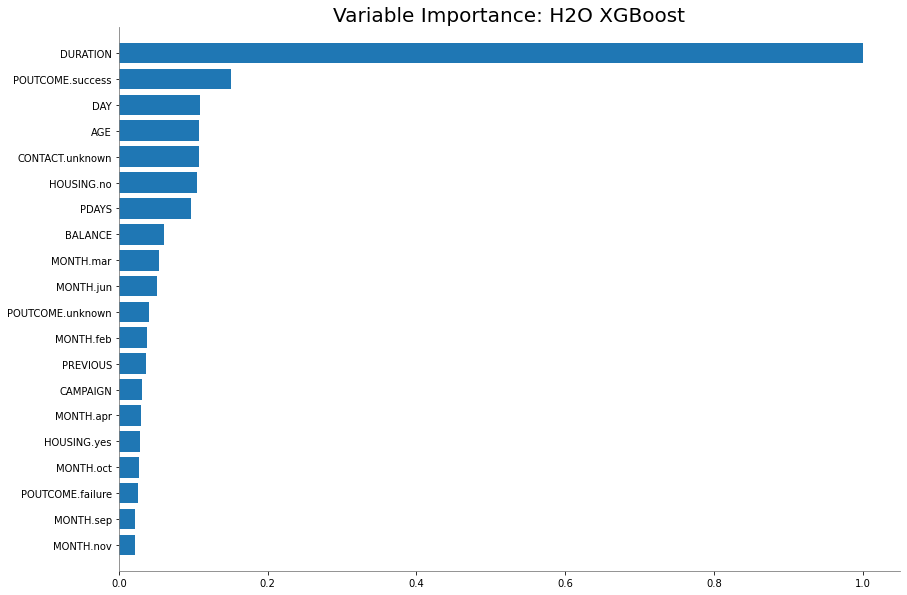

In [28]:
model.varimp_plot(num_of_features = 20)